In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from autots import AutoTS

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("covid19.csv")

In [3]:
df.head()

,Date,Date_YMD,Daily Confirmed,Daily Deceased
0,30 January 2020,2020-01-30,1,0
1,31 January 2020,2020-01-31,0,0
2,1 February 2020,2020-02-01,0,0
3,2 February 2020,2020-02-02,1,0
4,3 February 2020,2020-02-03,1,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Confirmed,720.0,52637.915278,78522.746943,0.0,10419.25,27383.0,54300.75,414280.0
Daily Deceased,720.0,675.901389,932.895333,0.0,159.00,387.0,734.75,6139.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             720 non-null    object
 1   Date_YMD         720 non-null    object
 2   Daily Confirmed  720 non-null    int64 
 3   Daily Deceased   720 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 22.6+ KB


In [6]:
df.isnull().sum()

Date               0
Date_YMD           0
Daily Confirmed    0
Daily Deceased     0
dtype: int64

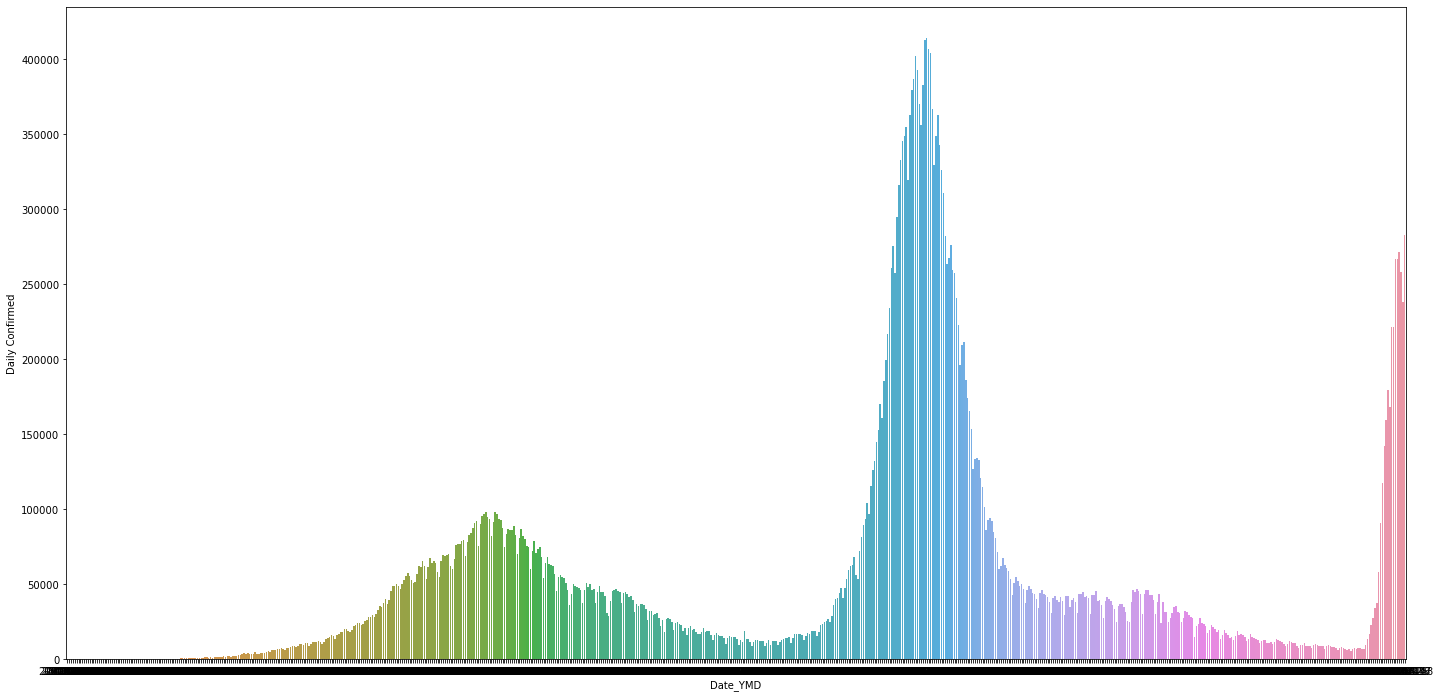

In [7]:
plt.figure(figsize=(24, 12))
sns.barplot(data = df, x='Date_YMD', y='Daily Confirmed')
plt.show()

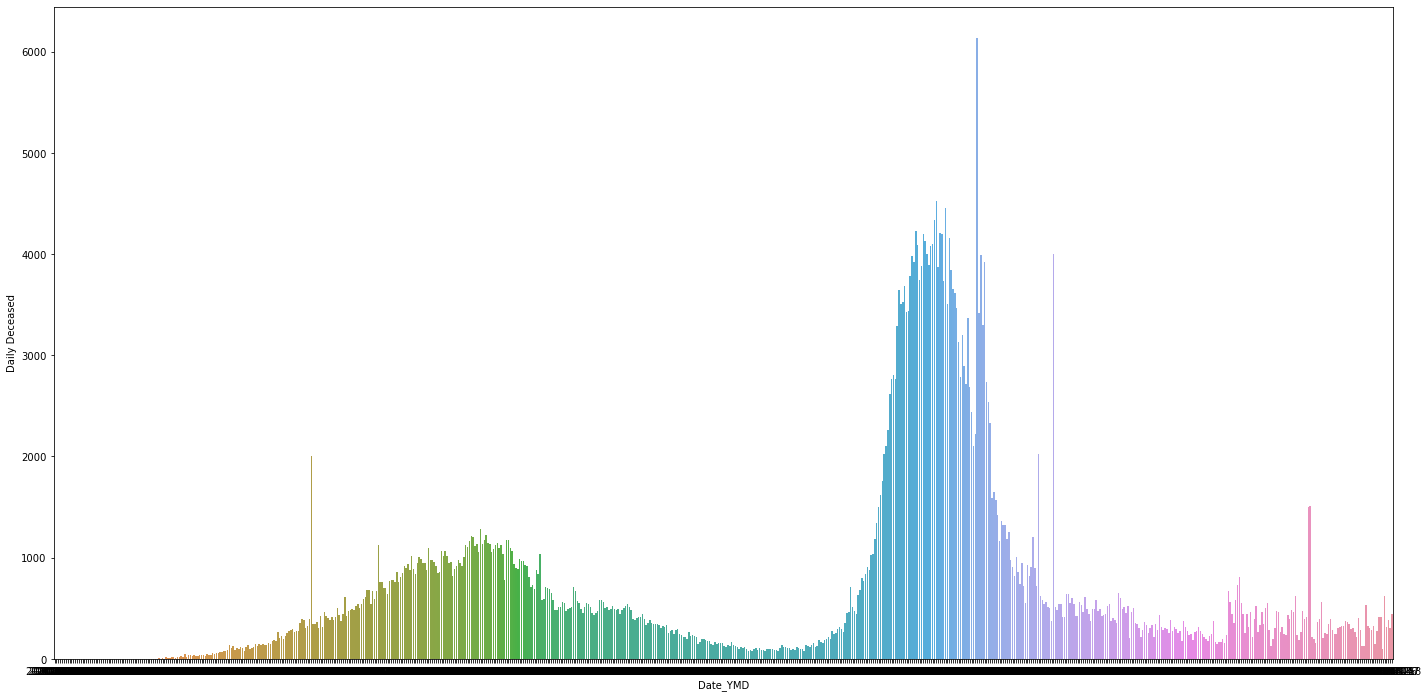

In [8]:
plt.figure(figsize=(24, 12))
sns.barplot(data = df, x='Date_YMD', y='Daily Deceased')
plt.show()

In [9]:
death_rate = (df["Daily Deceased"].sum() / df["Daily Confirmed"].sum()) * 100
print("Death Rate of Covid-19:",death_rate)

Death Rate of Covid-19: 1.2840580507834722


In [ ]:
model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')#covid-19 deaths prediction for the next 30 days
model = model.fit(df, date_col="Date_YMD", value_col='Daily Deceased', id_col=None)
prediction = model.predict()
forecast = prediction.forecast

In [11]:
print(forecast)

            Daily Deceased
2022-01-19      417.374409
2022-01-20      371.619793
2022-01-21      396.221734
2022-01-22      375.979016
2022-01-23      338.483870
2022-01-24      298.843094
2022-01-25      423.746006
2022-01-26      417.374409
2022-01-27      371.619793
2022-01-28      396.221734
2022-01-29      375.979016
2022-01-30      338.483870
2022-01-31      298.843094
2022-02-01      423.746006
2022-02-02      417.374409
2022-02-03      371.619793
2022-02-04      396.221734
2022-02-05      375.979016
2022-02-06      338.483870
2022-02-07      298.843094
2022-02-08      423.746006
2022-02-09      417.374409
2022-02-10      371.619793
2022-02-11      396.221734
2022-02-12      375.979016
2022-02-13      338.483870
2022-02-14      298.843094
2022-02-15      423.746006
2022-02-16      417.374409
2022-02-17      371.619793
